## Contents:
- 1) [Import Data](#Import-Data)
- 2) [Train/Test Split](#Train/Test-Split)
- 3) [Stop words](#Stop-words)
- 4) [RandomForest Model](#RandomForest-Model)   
- 5) [RandomForest and CountVectorizer](#RandomForest-and-CountVectorizer)  
- 6) [Logistic Regression](#Logistic-Regression)
- 7) [Logistic Regression and CountVectorizer](#Logistic-Regression-and-CountVectorizer)
- 8) [Logistic Regression and TF-IDF](#Logistic-Regression-and-TF-IDF)
- 9) [Logistic Regression Model (GridSearchCV)](#Logistic-Regression-Model-(GridSearchCV))
- 10) [Random Forest Model (GridSearchCV)](#Random-Forest-Model-(GridSearchCV))
- 11) [Sentimental Analysis](#Sentimental-Analysis)

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn import metrics
from sklearn.feature_extraction import text
from textblob import TextBlob, Word

import matplotlib.pyplot as plt
%matplotlib inline

## Import Data
[back to top](#Contents:)

In [2]:
# import combined comments data set for r/crypto and r/bodyweightfitness
df = pd.read_csv('../datasets/combined_comm.csv') 
df.head()

,body,target
0,"lol "" going postpone all our card need stand !...",1
1,rose gold doe not look like how the website sh...,1
2,cad usdc not :?,1
3,well said,1
4,yeah had card stolen same thing annoying but w...,1


## Train/Test Split
[back to top](#Contents:)

In [3]:
X = df['body']
y = df['target']

In [4]:
y.value_counts(normalize=True) # Classes looks balanced approx 50%

1    0.502198
0    0.497802
Name: target, dtype: float64

In [5]:
# Test size is default 0.25
# shuffle = True
# Even though the classes are balanced we will still stratify.

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

In [6]:
X_train.shape

(13647,)

In [7]:
X_test.shape

(4549,)

In [8]:
X_train.head()

15903                                 thanks for sharing! 
2135                                                cheer 
15762    for weight loss see you’ already tracking calo...
14434    yeah get bored with long running session often...
17548    let kid use free weight own home with equipmen...
Name: body, dtype: object

## Stop words
[back to top](#Contents:)

In [9]:
# https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn
# Update stop words dictionary by adding any words from frequent words lists.

text.ENGLISH_STOP_WORDS

add_stop_words = ['com','don','got','ha','wa','going']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

print(stop_words)

frozenset({'can', 'during', 'only', 'be', 'less', 'we', 'whole', 'what', 'yours', 'off', 'became', 'before', 'over', 'towards', 'anyone', 'their', 'ourselves', 'herein', 'couldnt', 'again', 'seem', 'yet', 'whom', 'describe', 'got', 'which', 'everywhere', 'side', 'with', 'here', 'whatever', 'whose', 'indeed', 'nevertheless', 'that', 'first', 'thick', 'get', 'else', 'become', 'most', 'being', 'detail', 'bill', 'done', 'ten', 'noone', 'throughout', 'at', 'against', 'otherwise', 'cry', 're', 'than', 'third', 'going', 'you', 'out', 'onto', 'fifteen', 'himself', 'whoever', 'last', 'because', 'none', 'nothing', 'almost', 'nowhere', 'latter', 'some', 'has', 'whereas', 'up', 'seems', 'everyone', 'somehow', 'from', 'within', 'never', 'after', 'forty', 'move', 'anything', 'whither', 'co', 'com', 'i', 'it', 'etc', 'few', 'found', 'one', 'he', 'well', 'fifty', 'interest', 'but', 'although', 'go', 'of', 'ever', 'keep', 'sometime', 'fire', 'may', 'me', 'was', 'anywhere', 'whereupon', 'per', 'then', '

## RandomForest Model
[back to top](#Contents:)

### stop words = english

In [10]:
cvec = CountVectorizer(stop_words="english",max_features= 10000)

rf = RandomForestClassifier(random_state= 42) # Instantiate Randomforest classifier

In [11]:
pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [12]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('rf', RandomForestClassifier(random_state=42))])

In [13]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9893016780244742
Test Score : 0.8977797318091888


In [14]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat01 = pd.DataFrame(data=rf_feat_imp , index= rf_feat)

In [15]:
df_rf_feat01.sort_values(by=0,ascending=False).head(30)

,0
card,0.032263
crypto,0.019409
exercise,0.017459
cro,0.015256
weight,0.014498
training,0.013503
workout,0.013102
pull,0.012981
body,0.012146
muscle,0.012043


### stop words = using additional stop words (stop_words)

In [16]:
cvec = CountVectorizer(stop_words= stop_words,max_features= 10000)

rf = RandomForestClassifier(random_state= 42) # Instantiate Randomforest classifier

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train,y_train)

print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9886421924232432
Test Score : 0.8969004176742141


In [17]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat02 = pd.DataFrame(data=rf_feat_imp , index= rf_feat)
df_rf_feat02.columns = ['feature_importances_']

In [18]:
df_rf_feat02.sort_values(by='feature_importances_',ascending=False).head(30)

,feature_importances_
card,0.033642
crypto,0.019518
exercise,0.017313
cro,0.014991
muscle,0.014662
body,0.013886
pull,0.012709
weight,0.011962
doing,0.011703
workout,0.011614


## RandomForest and CountVectorizer 
[back to top](#Contents:)

### using additional stop_words and n-grams(1,3)

In [19]:
cvec = CountVectorizer(stop_words= stop_words, max_features= 10000, ngram_range= (1,3))
rf = RandomForestClassifier(random_state=42)

In [20]:
pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [21]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=10000, ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', '

In [22]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9850516597054297
Test Score : 0.8988788744779073


In [23]:
rf_feat = cvec.get_feature_names()
rf_feat_imp = rf.feature_importances_

df_rf_feat03 = pd.DataFrame(data=rf_feat_imp , index= rf_feat)
df_rf_feat03.columns = ['feature_importances_']

In [24]:
df_rf_feat03.sort_values(by = 'feature_importances_', ascending= False).head(50)

,feature_importances_
card,0.032249
exercise,0.019076
crypto,0.016822
training,0.015697
muscle,0.014853
cro,0.014631
weight,0.013455
body,0.013108
pull,0.012122
workout,0.011850


In [25]:
df_rf_feat03.sort_values(by = 'feature_importances_', ascending= False).tail(30)

,feature_importances_
cro cronos,0.0
pushup knee,0.0
cro defi,0.0
pushup like,0.0
cro exchange,0.0
thirty,0.0
course doing,0.0
couple set,0.0
consult,0.0
couple rep,0.0


## Logistic Regression
[back to top](#Contents:)

### stop words = english

In [26]:
cvec = CountVectorizer(stop_words="english",max_features= 10000)

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec',cvec),
    ('lr',lr)
])

In [27]:
# Baseline Logistic Model

pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=10000, stop_words='english')),
                ('lr', LogisticRegression())])

In [28]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9597713783249066
Test Score : 0.9136073862387338


In [29]:
lr.coef_.T

array([[ 4.37948637e-01],
       [ 1.86739560e-02],
       [ 4.96315159e-03],
       ...,
       [-7.23075352e-02],
       [-7.23075352e-02],
       [-3.01685073e-04]])

In [30]:
lr_feat01 = pd.DataFrame(data=lr.coef_.T, index= cvec.get_feature_names())

lr_feat01.columns = ['coef_']

In [31]:
 # create a column for absolute value as there are negative values
lr_feat01['abs_coef'] = np.abs(lr_feat01['coef_'])

In [32]:
# sort the data frame in ascending to check word with high coef value.
lr_feat01.sort_values(by='abs_coef', ascending=False).head(40)

,coef_,abs_coef
card,3.541981,3.541981
crypto,2.874372,2.874372
cro,2.750971,2.750971
exercise,-2.684169,2.684169
workout,-2.659246,2.659246
cdc,2.648129,2.648129
mco,2.528406,2.528406
routine,-2.479530,2.479530
training,-2.414819,2.414819
muscle,-2.400400,2.400400


### stop words = using additional stop words (stop_words)

In [33]:
cvec = CountVectorizer(stop_words= stop_words, max_features= 10000)

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [34]:

pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=10000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
           

In [35]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9591118927236756
Test Score : 0.912068586502528


In [36]:
lr_feat02 = pd.DataFrame(data = lr.coef_.T, index= cvec.get_feature_names())

lr_feat02.columns = ['coef_']

In [37]:
# sort the data frame in ascending to check word with high coef value.
lr_feat02.sort_values(by='coef_', ascending=False).head(40)

,coef_
card,3.544405
crypto,3.025547
cro,2.749945
cdc,2.664074
mco,2.536847
earn,2.069401
coin,2.019782
exchange,1.962616
fee,1.906571
market,1.830979


## Logistic Regression and CountVectorizer
[back to top](#Contents:)

### using stop_words and n-gram(1,3)

In [38]:
cvec = CountVectorizer(stop_words= stop_words, max_features= 10000, ngram_range= (1,3))

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [39]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_features=10000, ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', '

In [40]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9595515497911629
Test Score : 0.9111892723675533


In [41]:
lr_feat03 = pd.DataFrame(data = lr.coef_.T, index = cvec.get_feature_names())
lr_feat03.columns = ['coef_']
lr_feat03['abs_coef'] = np.abs(lr_feat03['coef_'])

In [42]:
lr_feat03.tail(20)

,coef_,abs_coef
ymmv,-0.142525,0.142525
yoga,-1.692958,1.692958
yoga class,-0.000015,0.000015
yoghurt,0.178245,0.178245
yogurt,-0.050423,0.050423
youll,-0.130208,0.130208
young,-0.098929,0.098929
younger,-0.001275,0.001275
youre,-0.350151,0.350151
youtube,-0.693758,0.693758


In [43]:
lr_feat03.sort_values(by='abs_coef',ascending=False).head(50)

,coef_,abs_coef
card,3.489117,3.489117
crypto,2.993704,2.993704
cro,2.728469,2.728469
exercise,-2.635987,2.635987
cdc,2.626554,2.626554
workout,-2.618726,2.618726
mco,2.539630,2.539630
routine,-2.432774,2.432774
training,-2.398200,2.398200
muscle,-2.374034,2.374034


In [44]:
lr_feat03.sort_values(by='abs_coef',ascending=False).tail(50)

,coef_,abs_coef
tue dec,-3.577866e-07,3.577866e-07
tue dec 2020,-3.577866e-07,3.577866e-07
approx,-3.459072e-07,3.459072e-07
power clean,3.430849e-07,3.430849e-07
great building,3.205894e-07,3.205894e-07
staked 000 cro,-3.166588e-07,3.166588e-07
eat doesn,3.115698e-07,3.115698e-07
ring set,3.033250e-07,3.033250e-07
nikki,-2.752205e-07,2.752205e-07
need strong,-2.733847e-07,2.733847e-07


## Logistic Regression and TF-IDF
[back to top](#Contents:)

### using stop_words and n-grams(1,3)

In [45]:
tf = TfidfVectorizer(stop_words= stop_words, max_features= 10000, ngram_range= (1,3))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [46]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(max_features=10000, ngram_range=(1, 3),
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'an

In [47]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test score :', pipe.score(X_test,y_test))

Train Score : 0.9497325419506119
Test score : 0.91756429984612


In [48]:
lr_tf_feat01 = pd.DataFrame(data = lr.coef_.T, index = cvec.get_feature_names())
lr_tf_feat01.columns = ['coef_']
lr_tf_feat01['abs_coef'] = np.abs(lr_tf_feat01['coef_'])

In [49]:
lr_tf_feat01.sort_values(by = 'abs_coef', ascending= False).head(50)

,coef_,abs_coef
card,8.137515,8.137515
crypto,6.483516,6.483516
cro,5.480030,5.480030
exercise,-5.198318,5.198318
workout,-4.870598,4.870598
muscle,-4.800909,4.800909
cdc,4.795335,4.795335
training,-4.674761,4.674761
body,-4.587093,4.587093
mco,4.512741,4.512741


In [50]:
lr_tf_feat01.sort_values(by = 'abs_coef', ascending= False).tail(30)

,coef_,abs_coef
really important,-0.001026,0.001026
450,0.000968,0.000968
best option,0.000921,0.000921
day lower,0.000904,0.000904
think pretty,0.000871,0.000871
throwing,0.000860,0.000860
inefficient,0.000839,0.000839
best people,-0.000767,0.000767
wall push,-0.000706,0.000706
wall push ups,-0.000706,0.000706


## Logistic Regression and TF-IDF (Baseline Model)

In [51]:
tf = TfidfVectorizer(max_features=10000)

lr = LogisticRegression()

In [52]:
pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [53]:
# Baseline Logistic Model

pipe.fit(X_train,y_train)

Pipeline(steps=[('tf', TfidfVectorizer(max_features=10000)),
                ('lr', LogisticRegression())])

In [54]:
print('Train Score :', pipe.score(X_train,y_train))
print('Test Score :', pipe.score(X_test,y_test))

Train Score : 0.9464351139444567
Test Score : 0.9147065289074522


In [55]:
lr_tf_feat02 = pd.DataFrame(data = lr.coef_.T, index = cvec.get_feature_names())
lr_tf_feat02.columns = ['coef_']
lr_tf_feat02['abs_coef'] = np.abs(lr_tf_feat02['coef_'])

In [56]:
lr_tf_feat02.sort_values(by = 'abs_coef', ascending= False).head(50)

,coef_,abs_coef
daily life,8.388461,8.388461
eccentric pull,6.086306,6.086306
eat maintenance,5.722606,5.722606
good news,-5.057017,5.057017
day training,4.920223,4.920223
workout help,-4.667886,4.667886
neglect,-4.642117,4.642117
minimum month,4.541619,4.541619
whitelist,-4.429835,4.429835
used train,-4.413217,4.413217


In [57]:
lr_tf_feat02.sort_values(by = 'abs_coef', ascending= False).tail(30)

,coef_,abs_coef
bodybuilding,0.000058,0.000058
card definitely,-0.000056,0.000056
just make,-0.000053,0.000053
strive,-0.000053,0.000053
time eat,0.000051,0.000051
need used,0.000040,0.000040
weekend,-0.000039,0.000039
points,-0.000039,0.000039
investor,-0.000039,0.000039
sweat,-0.000038,0.000038


## Logistic Regression and TF-IDF using additional stop_words

In [58]:
tf = TfidfVectorizer(stop_words= stop_words, max_features= 10000)

In [59]:
lr = LogisticRegression()

In [60]:
pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [61]:
# Baseline Logistic Model
pipe.fit(X_train,y_train)

Pipeline(steps=[('tf',
                 TfidfVectorizer(max_features=10000,
                                 stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
             

In [62]:
print('Train Score:', pipe.score(X_train,y_train))
print('Test Score:', pipe.score(X_test,y_test))

Train Score: 0.9525170367113651
Test Score: 0.9186634425148384


In [63]:
lr_tf_feat03 = pd.DataFrame(data = lr.coef_.T, index=cvec.get_feature_names())
lr_tf_feat03.columns = ['coef_']
lr_feat01['abs_coef'] = np.abs(lr_feat01['coef_'])

In [64]:
lr_tf_feat03.sort_values(by = 'coef_',ascending=False).head(20)

,coef_
correctly,7.840369
doctor told,6.336555
distance,5.300000
creative,4.765649
lot different,4.387900
foot ground,3.413607
extreme,3.190662
dang,3.159877
bryan,2.924157
genuinely,2.872877


In [65]:
lr_tf_feat03.sort_values(by = 'coef_',ascending=False).tail(20)

,coef_
people say,-2.907706
fair,-2.953063
plan use,-2.983285
planche lever,-3.015748
elbows,-3.046594
leg curl,-3.067870
stabilizer,-3.148515
excessive,-3.168439
ups did,-3.277049
card using,-3.313477


## Logistic Regression Model (GridSearchCV)
[back to top](#Contents:)

### Baseline

In [66]:
# https://towardsdatascience.com/logistic-regression-model-tuning-with-scikit-learn-part-1-425142e01af5
# Set pipeline
# Initialize

cvec = CountVectorizer(stop_words= stop_words)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [67]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       'anything

In [68]:
print('Train Score:', pipe.score(X_train,y_train))
print('Test Score:', pipe.score(X_test,y_test))

Train Score: 0.9632886348648054
Test Score: 0.9129479006375028


 ## gridsearch

In [69]:
# gridsearchCV tests cross-validation for the parameters.

params = {
    'cvec__max_features':[5000,8000,10000],
    'lr__penalty':['l1','l2'],
    'lr__C':np.logspace(-10,0,10)
}
gs = GridSearchCV(pipe,param_grid=params, cv=3, verbose=1)

# estimator = pipe
# param_grid = dict or list of dictionaries
# cv = int, cross-validation generator or an iterable, default=None
# verbose = Controls the verbosity: the higher, the more messages.

gs.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/mubin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueErro

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                              'almost',
                                                            

In [70]:
print('gs.best_score',gs.best_score_)
print('gs.best_params', gs.best_params_)
print('gs.score(X_test,y_test)',gs.score(X_test,y_test))

gs.best_score 0.9039349307540118
gs.best_params {'cvec__max_features': 10000, 'lr__C': 1.0, 'lr__penalty': 'l2'}
gs.score(X_test,y_test) 0.912068586502528


## Random Forest Model (GridSearchCV)
[back to top](#Contents:)

### Baseline

In [71]:
cvec = CountVectorizer(stop_words= stop_words, max_features= 10000)
rf = RandomForestClassifier(random_state=42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [72]:
# Baseline RandomForest

pipe.fit(X_train,y_train)
print('Train Score:', pipe.score(X_train, y_train))
print('Test Score:', pipe.score(X_test,y_test))

Train Score: 0.9886421924232432
Test Score: 0.8969004176742141


## GridSearch

In [73]:
%%time
# gridsearchCV tests cross-validation for the parameters.

params = {
    'cvec__max_features':[5000,8000,10000],
    'cvec__ngram_range':[(1,1),(1,2)],
    'rf__n_estimators':[10,20,30],
    'rf__max_depth':[None,10,20]
}
gs = GridSearchCV(pipe,param_grid=params, cv=3, verbose=1)

# estimator = pipe
# param_grid = dict or list of dictionaries
# cv = int, cross-validation generator or an iterable, default=None
# verbose = Controls the verbosity: the higher, the more messages.

gs.fit(X_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
CPU times: user 1min 51s, sys: 283 ms, total: 1min 51s
Wall time: 1min 51s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('cvec',
                                        CountVectorizer(max_features=10000,
                                                        stop_words=frozenset({'a',
                                                                              'about',
                                                                              'above',
                                                                              'across',
                                                                              'after',
                                                                              'afterwards',
                                                                              'again',
                                                                              'against',
                                                                              'all',
                                                                        

In [74]:
print('gs.best_score', gs.best_score_)
print('gs.best_params', gs.best_params_)
print('gs.score(X_test,y_test)', gs.score(X_test,y_test))

gs.best_score 0.8864219242324319
gs.best_params {'cvec__max_features': 10000, 'cvec__ngram_range': (1, 1), 'rf__max_depth': None, 'rf__n_estimators': 30}
gs.score(X_test,y_test) 0.8966805891404704


## Sentimental Analysis
[back to top](#Contents:)

In [75]:
# Function which accepts text and returns polarity
def sentiment(text):
    return TextBlob(text).sentiment.polarity

In [76]:
%%time
# Create a new DataFrame column for sentiment
df['sentiment'] = df.body.apply(sentiment)

CPU times: user 2.89 s, sys: 30.7 ms, total: 2.92 s
Wall time: 2.94 s


In [77]:
df.head()

,body,target,sentiment
0,"lol "" going postpone all our card need stand !...",1,1.000000
1,rose gold doe not look like how the website sh...,1,0.550000
2,cad usdc not :?,1,0.000000
3,well said,1,0.000000
4,yeah had card stolen same thing annoying but w...,1,0.076667


Text(0.5, 1.0, 'Crypto sentiment')

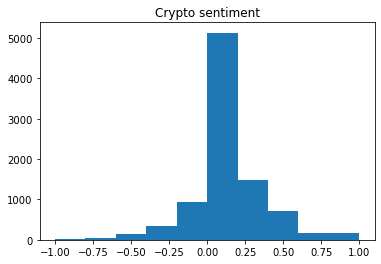

In [78]:
# Crypto_com sentiment histogram
crypto = df[df['target'] == 1]
plt.hist(crypto['sentiment'])
plt.title('Crypto sentiment')

Text(0.5, 1.0, 'Bodyweightfitness sentiment')

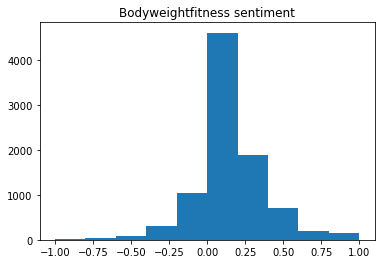

In [79]:
# bodyweightfitness sentiment histogram
fitness = df[df['target'] == 0]
plt.hist(fitness['sentiment'])
plt.title('Bodyweightfitness sentiment')

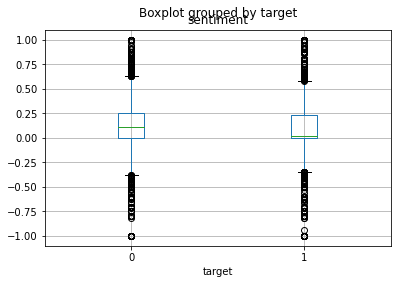

In [80]:
# Boxplot grouped by target Sentiment

df.boxplot(column = 'sentiment', by = 'target');

In [81]:
print('Crypto mean sentiment:', df[df['target'] == 1].sentiment.mean())
print('Crypto median sentiment:', df[df['target'] == 1].sentiment.median())

Crypto mean sentiment: 0.10844257144167661
Crypto median sentiment: 0.014245129870129863


In [82]:
print('Fitness mean sentiment:', df[df['target'] == 0].sentiment.mean())
print('Fitness median sentiment:', df[df['target'] == 0].sentiment.median())

Fitness mean sentiment: 0.13875229678706325
Fitness median sentiment: 0.10833333333333332


Sentiment analysis using TextBlob, below are the mean and median sentiment for respective subreddit's.

- **Crypto mean sentiment: 0.10844257144167661**
- **Crypto median sentiment: 0.014245129870129863**

- **Fitness mean sentiment: 0.13875229678706325**
- **Fitness median sentiment: 0.10833333333333332**

There is a good balance of both positive and negative sentiments. This could be because of a diverse group of participants across both bodyweightfitness and crypto ranging from amateur to regular fitness goers and similarly amateur to seasoned investors for crypto.